In [ ]:
import pandas as pd
sales = pd.read_csv("sales_data.csv")
sales.head()

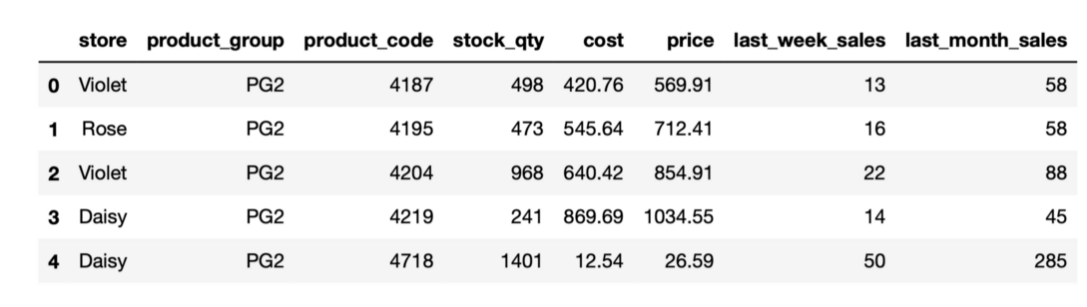

In [ ]:
#We can calculate the average stock quantity for each store as follows:

sales.groupby("store")["stock_qty"].mean()

Output:
store
Daisy      1811.861702
Rose       1677.680000
Violet    14622.406061
Name: stock_qty, dtype: float64

In [ ]:
#Here is how we can calculate the average stock quantity and price for each store.
sales.groupby("store")[["stock_qty","price"]].mean()

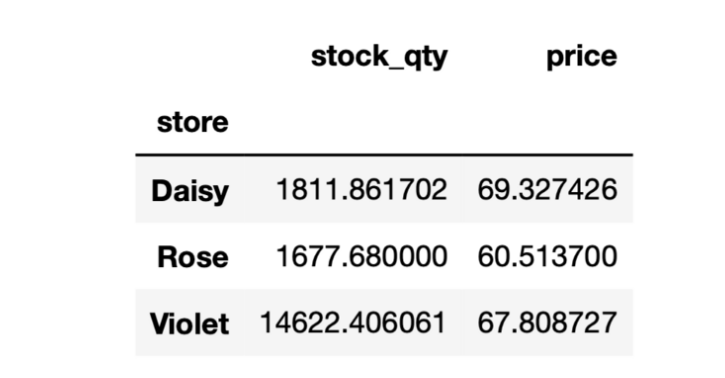

In [ ]:
#We can also use the agg function for calculating multiple aggregate values.
sales.groupby("store")["stock_qty"].agg(["mean", "max"])

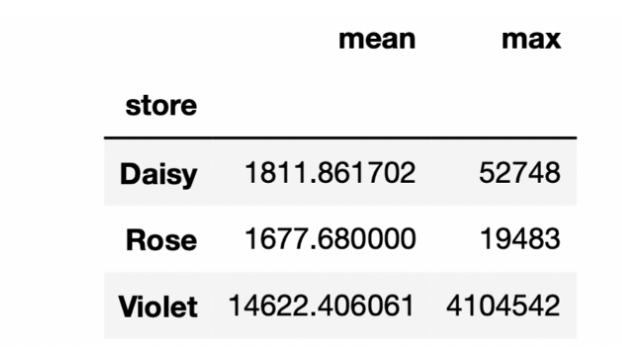

In [ ]:
"""In the previous two examples, it’s not clear what the aggregate columns represent. 
For instance, “mean” does not tell us it is the mean of stock quantity. 
In such cases, we can use named aggregations""".
sales.groupby("store").agg(
    
    avg_stock_qty = ("stock_qty", "mean"),
    max_stock_qty = ("stock_qty", "max")
)

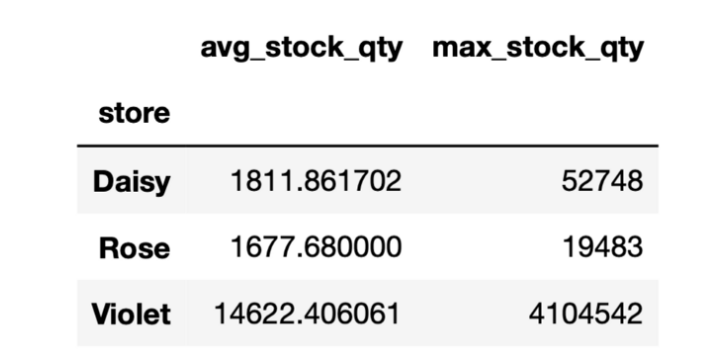

In [ ]:
#Multiple aggregations and multiple functions
sales.groupby("store")[["stock_qty","price"]].agg(["mean", "max"])

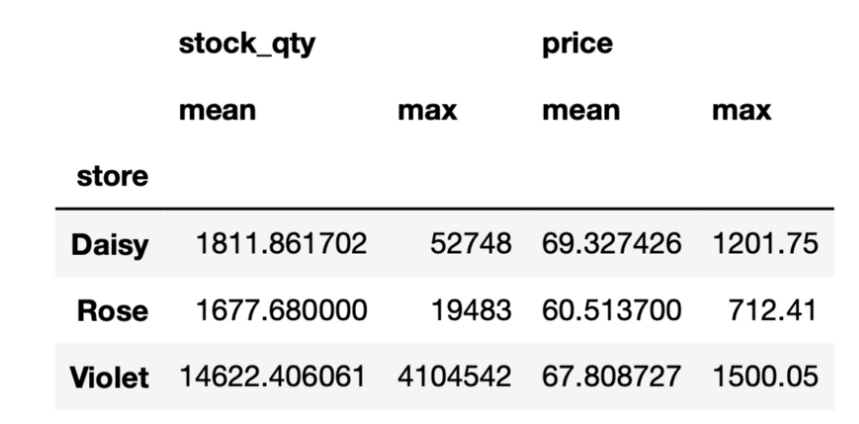

In [ ]:
# Named aggregations using different columns
sales.groupby("store").agg(
    
    avg_stock_qty = ("stock_qty", "mean"),
    avg_price = ("price", "mean")
)

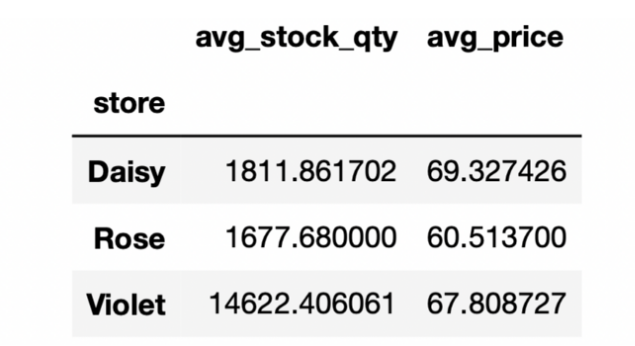

In [ ]:
#as_index parameter
"""If the output of a groupby operation is DataFrame, the group values are shown in the index.
We can make them a column in the DataFrame using the as_index parameter."""
sales.groupby("store", as_index=False).agg(
    
    avg_stock_qty = ("stock_qty", "mean"),
    avg_price = ("price", "mean")
)

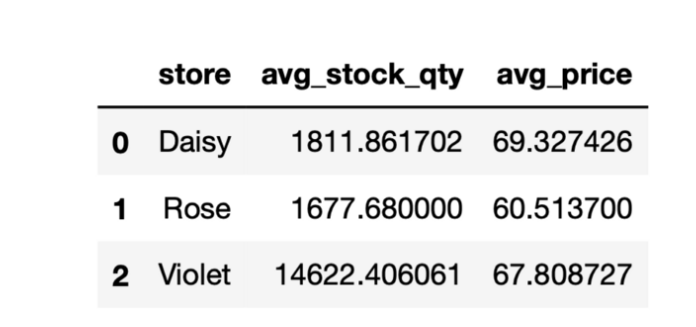

In [ ]:
# Multiple columns for grouping
sales.groupby(["store","product_group"], as_index=False).agg(
   
    avg_sales = ("last_week_sales", "mean")
    
).head()

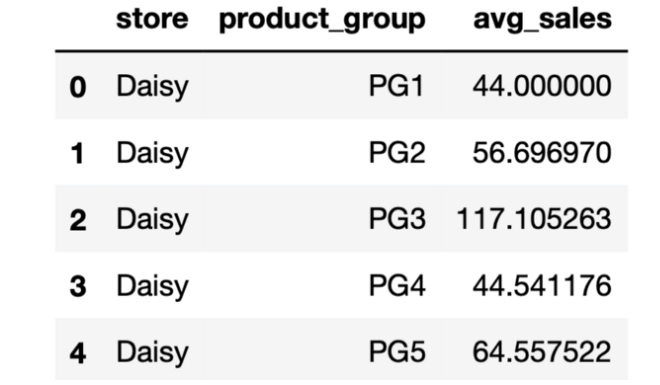

In [ ]:
# Sorting the output
sales.groupby(["store","product_group"], as_index=False).agg(
   avg_sales = ("last_week_sales", "mean")
    
).sort_values(by="avg_sales", ascending=False).head()

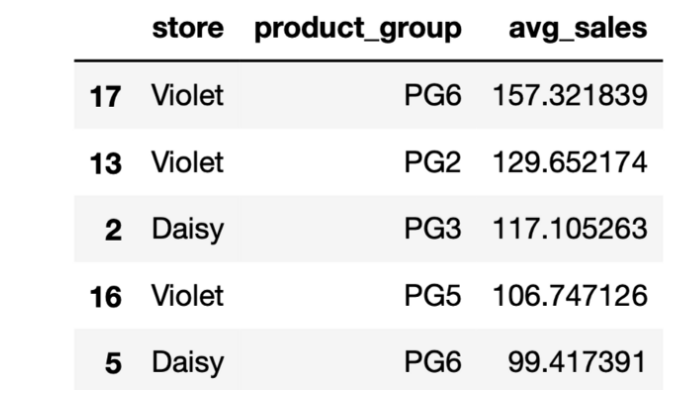

In [ ]:
#Largest n values
"""The max function returns the maximum value for each group. 
If we need the largest n of values, we can use the nlargest function."""
sales.groupby("store")["last_week_sales"].nlargest(2)

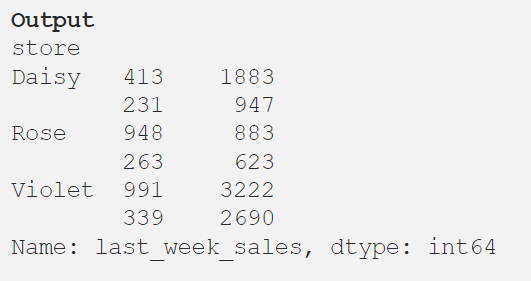

In [ ]:
# Smallest n values
#The nsmallest function returns the n smallest values for each group.
sales.groupby("store")["last_week_sales"].nsmallest(2)

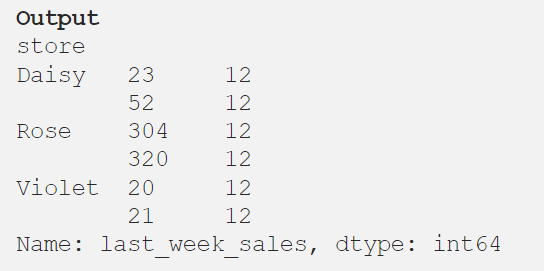

In [ ]:
# Unique values
"""The unique function can be used for finding the unique values in each group. 
For instance, we can find the unique product codes in each group as follows:"""
sales.groupby("store", as_index=False).agg(
   unique_values = ("product_code","unique")
)

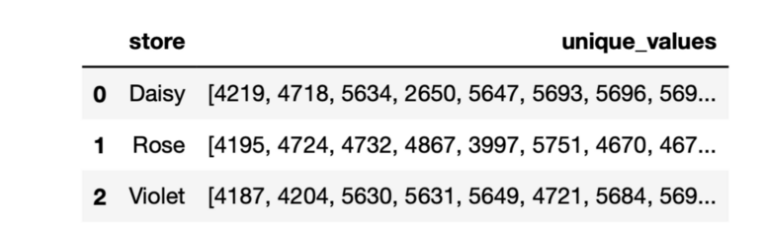

In [ ]:
#Number of unique values
#We can also find the number of unique values in each group using the nunique function.
sales.groupby("store", as_index=False).agg(
   number_of_unique_values = ("product_code","nunique")
)

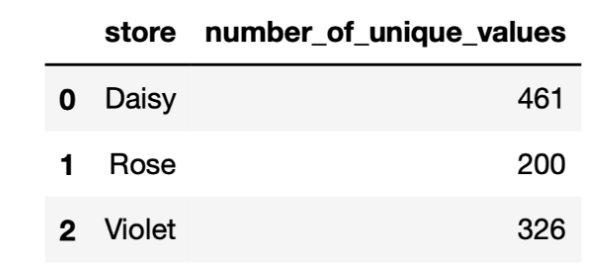

In [ ]:
# Lambda expressions
# We can use lambda expressions as aggregations in the agg function.
sales.groupby("store").agg(
    
    total_sales_in_thousands = (
        "last_month_sales", 
        lambda x: round(x.sum() / 1000, 1)
    )
    
)

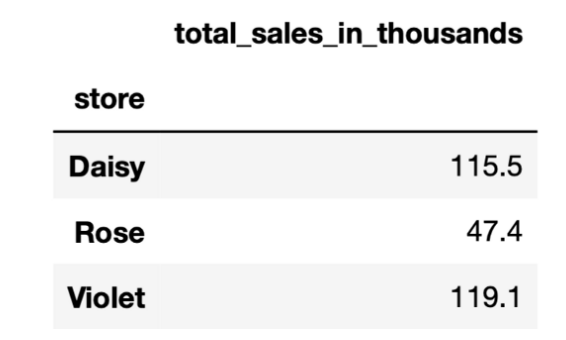

In [ ]:
#Lambda expressions with apply
"""Lambda expressions can be applied to each group using the apply function. 
For instance, we can calculate the average of the difference between the last week sales 
and one fourth of the last month sales for each store as follows:"""
sales.groupby("store").apply(
    lambda x: (x.last_week_sales - x.last_month_sales / 4).mean()
)

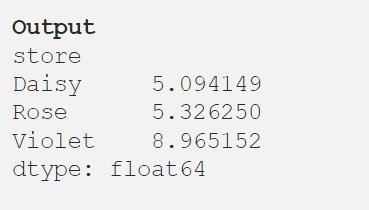

In [ ]:
#How many groups
#We sometimes need to know how many groups are generated, which can be found using the ngroups method.
sales.groupby(["store", "product_group"]).ngroups

Output
18

#There are 18 different combinations of the distinct values in the store and product group columns.

In [ ]:
# Getting a particular group
#For instance, we can get the rows that belong to store “Daisy” and product group “PG1” as follows:
daisy_pg1 = sales.groupby(
    ["store", "product_group"]
).get_group(("Daisy","PG1"))
daisy_pg1.head()

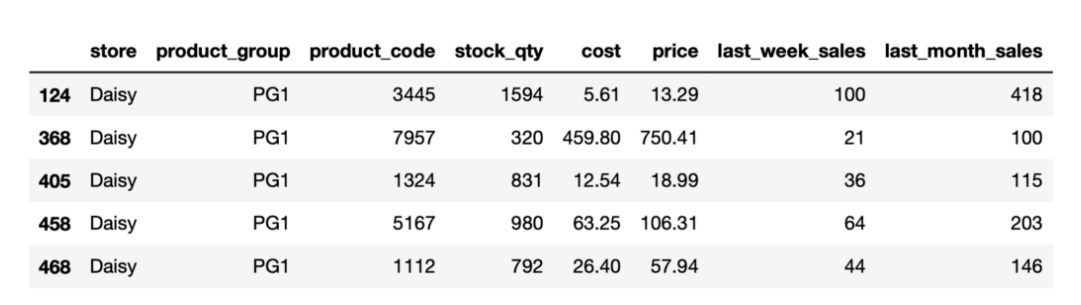

In [ ]:
# Assigning a rank
"""The rank function is used for assigning a rank to the rows based on the values in the given column.
We can use the rank and the groupby functions to rank rows within each group separately."""
sales["rank"] = sales.groupby("store"["price"].rank(
   ascending=False, method="dense"
)
sales.head()

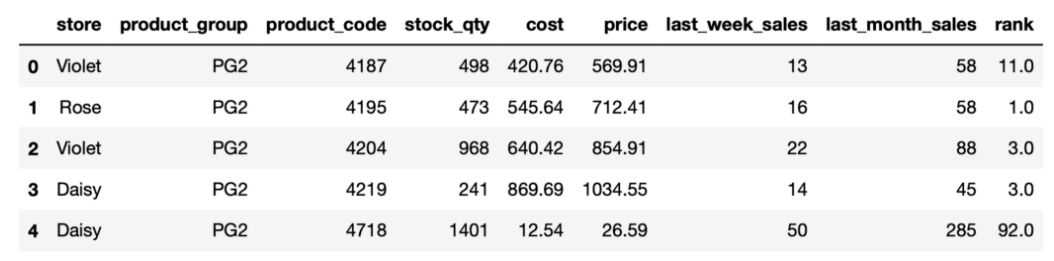